# Speed in Valencian Streets
A Data Cleaning Project

In [7]:
pip show matplotlib

Name: matplotlib
Version: 3.5.0
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: c:\users\sguer\miniconda3\envs\project 1\lib\site-packages
Requires: numpy, cycler, kiwisolver, packaging, pillow, python-dateutil, pyparsing, fonttools
Required-by: yellowbrick, seaborn, matplotlib-venn, bioinfokit, adjustText
Note: you may need to restart the kernel to use updated packages.


![](https://lp-cms-production.imgix.net/2020-11/Valencia.jpg)

As Spain's third largest city, Valencia is a Mediterranean city dating back to the 2nd century BC. With a rich history and culture, its architecture and street distribution is complex and heterogeneous. Due to its density (5865.1/km2), it's a challenge to ensure a smooth traffic flow and a safe environment for pedestrians. In this project, I will explore and clean a data set containing all streets from the city of Valencia, along with their features. A key component of the data set is the inclusion of the maximum speed of circulation for vehicles (in km/h) for each of the streets. 

The goal with this project is to modify and transcribe the available data, so that it is easier to process and use for data science applications, maintaining the principles of accuracy, completeness, consistency, timeliness, validity, and uniqueness.

## 1. The Imports

In [608]:
import numpy as np
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [609]:
calles = pd.read_csv("velocitat-carrers-velocidad-calles.csv", delimiter=";")

## 2. The Data

The data set is a public data set licenced under Creative Commons, published by the Valencian local government (https://datos.gob.es/es/catalogo/l01462508-velocitat-carrers-velocidad-calles).

![valenciablog.com](https://www.valenciablog.com/wp-content/uploads/2015/09/mapa-zona-30-50-valencia.jpg)

In [667]:
calles.head()

,Street Name,Street Type,Residential,Bikeway,Street Length,Latitude,Longitude,Street Coordinates
0,Borriana,Street,0,0,110.438921,39.46497917115678,-0.3670659296642545,"[[-0.3676281242168885, 39.464739661983614], [-..."
1,Virginia Woolf,Street,0,0,31.060677,39.46552907325966,-0.39837878029210605,"[[-0.39833955231016577, 39.46566557981171], [-..."
2,Maria Cuber,Street,0,0,56.073901,39.46394606678843,-0.33327634103883713,"[[-0.3335985925218705, 39.46398198202541], [-0..."
3,Pelai,Street,0,0,76.720942,39.46527961635818,-0.3792601382226916,"[[-0.3791199815957301, 39.46560752488556], [-0..."
4,Lo Rat Penat,Street,0,0,181.701132,39.465148658939995,-0.3543057149035328,"[[-0.3539200698497013, 39.465910241605584], [-..."


In [611]:
calles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12811 entries, 0 to 12810
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   objectid         12811 non-null  int64  
 1   tipcalle         12790 non-null  object 
 2   nomcalle         12790 non-null  object 
 3   velocidad        12811 non-null  object 
 4   st_length_shape  12811 non-null  float64
 5   geo_shape        12811 non-null  object 
 6   geo_point_2d     12811 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 700.7+ KB


#### Features

The data set contains 7 features, namely:
* **objectid**: A unique integer identifier for each street.
* **tipcalle**: The street type (street, avenue, square, etc.)
* **nomcalle**: The street name.
* **velocidad**: The maximum circulation speed for the street (in km/h).
* **st_length_shape**: The street length (in meters).
* **geo_shape**: A GIS data type that contains the shape of the street as identified on a map, along with the bounding coordinates of that shape.
* **geo_point_2d**: The coordinates of a reference point of the street (in latitude/longitude format).

In [612]:
pd.concat([calles.nunique(),calles.isnull().sum()], keys=['Unique values', 'Null values'], axis=1)

,Unique values,Null values
objectid,12811,0
tipcalle,28,21
nomcalle,3126,21
velocidad,7,0
st_length_shape,12746,0
geo_shape,12796,0
geo_point_2d,12791,0


#### Null Values

There are 21 streets with null values for street type and street name. However, they have geographical information, so we should inspect them further.

In [613]:
null_coord = calles[calles.tipcalle.isnull()]['geo_shape'].apply(json.loads).apply(pd.Series)

In [614]:
null_coord

,coordinates,type
3481,"[[-0.40734389008966876, 39.48154763391223], [-...",LineString
3482,"[[-0.3694716815259191, 39.480970110146636], [-...",LineString
3483,"[[-0.3995438213165411, 39.453302545426396], [-...",LineString
3484,"[[-0.37106509576989105, 39.445592572802155], [...",LineString
3486,"[[-0.38822658512652614, 39.44176055688611], [-...",LineString
3487,"[[-0.38631445062796815, 39.497791278901985], [...",LineString
3492,"[[-0.3531600900977928, 39.48845306710343], [-0...",LineString
5966,"[[-0.40654483200992136, 39.48096043462735], [-...",LineString
5967,"[[-0.3412465112613871, 39.45116835119591], [-0...",LineString
5968,"[[-0.37057601540663737, 39.48064376197666], [-...",LineString


After having inspected a couple of the null values, we can see they correspond to unnamed little streets or crossings that are not relevant. We will drop their instances.

In [615]:
calles = calles.dropna(subset=['nomcalle'], axis=0)

## 3. Feature Analysis

### objectid

Every row has a unique value (12811), which points at every road being unique (no duplicates). We will see later how this is incoorect.

In [616]:
calles['objectid'].describe()

count    12790.000000
mean      8376.038702
std       3701.648230
min       1944.000000
25%       5172.250000
50%       8374.500000
75%      11579.750000
max      15468.000000
Name: objectid, dtype: float64

Ranges from 1936 to 15468, so some skips are present.

In [617]:
calles = calles.rename(columns={'objectid': 'Street ID'})

### tipcalle

In [618]:
calles['tipcalle'].value_counts()

C/           7833
AV           1738
PL           1098
CARRER        558
CAMI          423
CTRA          207
ENTD          204
GV            132
PLAÇA         117
PG            100
CV             67
LLOC           61
CN             34
SENDA          32
CRA            30
AVINGUDA       30
PTDA           24
BARRI          23
GRUP           18
PTGE           17
PASSEIG        10
CAMÍ            9
TRAV            8
ENTRADOR        5
CRO             4
CAMÍ VELL       3
CH              3
CAMÍ NOU        2
Name: tipcalle, dtype: int64

In [619]:
calles.tipcalle.unique()

array(['C/', 'PL', 'AV', 'LLOC', 'CAMI', 'GV', 'BARRI', 'PG', 'PTDA',
       'CN', 'PTGE', 'CARRER', 'ENTD', 'PLAÇA', 'AVINGUDA', 'CTRA', 'CV',
       'SENDA', 'ENTRADOR', 'CAMÍ VELL', 'CRA', 'CH', 'GRUP', 'CRO',
       'CAMÍ', 'TRAV', 'PASSEIG', 'CAMÍ NOU'], dtype=object)

We have 28 unique values, given by their abbreviation in Spanish/Valencian, namely:
* C/: Calle (Street)
* AV: Avenida (Avenue)
* PL: Plaza (Square)
* CARRER: Carrer/Calle (Street)
* CAMÍ: Camnino (Path)
* CTRA: Carretera (Road)
* ENTD: Entrada (Entrance)
* GV: Gran Vía (Great Way)
* PLAÇA: Plaza (Square)
* PG: Passeig/Paseo (Promenade)
* CV: Camí Vell/Camino Viejo (Old Path)
* LLOC: Lloc/Lugar (Place/Other)
* CN: Camí Nou/Camino Nuevo (New Path)
* SENDA: Senda (Path)
* CRA: Carrera (Road)
* AVINGUDA: Avenida (Avenue)
* PTDA: Partida (Exit)
* BARRI: Barriada (Neighborhood St.)
* GRUP: Grupo (Street group)
* PTGE: Paseo (Promenade)
* CAMÍ: Camino (Path)
* TRAV: Travesía (Crossing)
* ENTRADOR: Entrada (Entrance)
* CRO: Carrero (Street)
* Camí Vell: Camino Viejo (Old Path)
* CH: -- No info (Street)
* CAMÍ NOU: Camino Nuevo (New Path)

We will group them in 7 types: Street, Avenue, Square, Path, Access, Road, and Other (LLOC)

In [620]:
street_names = {'C/': 'Street', 'PL': 'Square', 'AV': 'Avenue', 'LLOC': 'Other', 'CAMI': 'Path', 'GV': 'Avenue', 
                'BARRI': 'Street', 'PG': 'Avenue', 'PTDA': 'Access', 'CN': 'Path', 'PTGE': 'Avenue', 'CARRER': 'Street', 
                'ENTD': 'Access', 'PLAÇA': 'Square', 'AVINGUDA': 'Avenue', 'CTRA': 'Road', 'CV': 'Path',
                'SENDA': 'Path', 'ENTRADOR': 'Access', 'CAMÍ VELL': 'Path', 'CRA': 'Road', 'CH': 'Street', 'GRUP': 'Street',
                'CRO': 'Street', 'CAMÍ': 'Path', 'TRAV': 'Access', 'PASSEIG': 'Avenue', 'CAMÍ NOU': 'Path'}

In [621]:
calles = calles.replace({"tipcalle": street_names})

In [622]:
calles = calles.rename(columns={'tipcalle': 'Street Type'})

### nomcalle

This column refers to the street names. There are 3126 unique street names, with the longest one spanning 106 geographical points. We will look for anomalies.

In [623]:
calles.nomcalle.value_counts()

BLASCO IBÁÑEZ                 106
CID                           100
AUSIÀS MARCH                   69
MARQUÉS DEL TÚRIA              67
PRIMAT REIG                    65
                             ... 
CASTELLÓ DE RUGAT               1
PARE CARBONELL                  1
TOUS                            1
LLUÍS FENOLLET                  1
RAMÓN PAYÁ (METGE I MÚSIC)      1
Name: nomcalle, Length: 3126, dtype: int64

The formatting of the street names has issues sometimes, we will correct them. We exclude from the search digits and letters.

In [624]:
calles[calles['nomcalle'].str.contains('[^\w\s]', regex=True, na=False)]

,Street ID,Street Type,nomcalle,velocidad,st_length_shape,geo_shape,geo_point_2d
1,6547,Street,VIRGINIA WOOLF (ESCRIPTORA),Peatonal,31.060677,"{""coordinates"": [[-0.39833955231016577, 39.465...","39.46552907325966, -0.39837878029210605"
15,7280,Other,PONT D?ARAGÓ,50,225.995933,"{""coordinates"": [[-0.3639327205899772, 39.4688...","39.46886497074385, -0.36262103640553855"
26,7909,Street,ABEN AL-ABBAR,30,64.517440,"{""coordinates"": [[-0.3517747086436442, 39.4690...","39.46929311894224, -0.35165098010711643"
58,7385,Street,CORTES D?ARENÓS,30,52.026071,"{""coordinates"": [[-0.4164801113431994, 39.4686...","39.46840412353117, -0.4164599292239945"
61,7503,Street,ABEN AL-ABBAR,30,81.793905,"{""coordinates"": [[-0.35208731120189457, 39.468...","39.46867124686687, -0.35193124022098654"
...,...,...,...,...,...,...,...
12753,4807,Street,REPÚBLICA DE LA COSTA D?IVORI,30,64.061415,"{""coordinates"": [[-0.38710084947745654, 39.449...","39.449147880143656, -0.3871930004909871"
12774,8145,Street,FORN DE L?HOSPITAL,Peatonal,41.503019,"{""coordinates"": [[-0.38267532877514393, 39.471...","39.471554712221334, -0.3826794734783734"
12785,4717,Street,RAMÓN PAYÁ (METGE I MÚSIC),30,97.808589,"{""coordinates"": [[-0.4058411762271675, 39.5393...","39.53953209795931, -0.405349873988479"
12800,5248,Avenue,AMAT GRANELL MESADO (MILITAR),50,53.779453,"{""coordinates"": [[-0.3648805274559726, 39.4587...","39.458564226874124, -0.3647250249835046"


We see some issues:
* Accents are common on top of vowels in Valencian, we will replace them with simple vowels.
* Cedilles (ç) will be replaced by c.
* There are question marks where apostrophes should be, we will replace them with whitespaces.
* Dashes (-) and accents by themselves (´) will also become whitespaces.
* Mª is short for Maria, we will replace by it.
* Paretheses are present to give explanations of people in street names, we will delete their contents.
* Commas will have their contents after deleted, streets can be identified without them.
* Interpuncts (·) are characteristic of Valencian, but will be deleted.
* Dots (.) will be deleted.

In [626]:
calles['nomcalle'] = calles['nomcalle'].str.replace('Á', "A", regex=False)
calles['nomcalle'] = calles['nomcalle'].str.replace('À', "A", regex=False)
calles['nomcalle'] = calles['nomcalle'].str.replace('É', "E", regex=False)
calles['nomcalle'] = calles['nomcalle'].str.replace('È', "E", regex=False)
calles['nomcalle'] = calles['nomcalle'].str.replace('Í', "I", regex=False)
calles['nomcalle'] = calles['nomcalle'].str.replace('Ì', "I", regex=False)
calles['nomcalle'] = calles['nomcalle'].str.replace('Ï', "I", regex=False)
calles['nomcalle'] = calles['nomcalle'].str.replace('Ó', "O", regex=False)
calles['nomcalle'] = calles['nomcalle'].str.replace('Ò', "O", regex=False)
calles['nomcalle'] = calles['nomcalle'].str.replace('Ú', "U", regex=False)
calles['nomcalle'] = calles['nomcalle'].str.replace('Ù', "U", regex=False)
calles['nomcalle'] = calles['nomcalle'].str.replace('Ü', "U", regex=False)
calles['nomcalle'] = calles['nomcalle'].str.replace('Ç', "C", regex=False)
calles['nomcalle'] = calles['nomcalle'].str.replace('?', " ", regex=False)
calles['nomcalle'] = calles['nomcalle'].str.replace('·', "", regex=False)
calles['nomcalle'] = calles['nomcalle'].str.replace('´', " ", regex=False)
calles['nomcalle'] = calles['nomcalle'].str.replace('-', " ", regex=False)
calles['nomcalle'] = calles['nomcalle'].str.replace('ª', "ARIA", regex=False)
calles['nomcalle'] = calles['nomcalle'].str.replace('\(([^)]+)\)', "", regex=True)
calles['nomcalle'] = calles['nomcalle'].str.replace('\((.+)', "", regex=True)
calles['nomcalle'] = calles['nomcalle'].str.replace('\,(.+)', "", regex=True)
calles['nomcalle'] = calles['nomcalle'].str.replace('.', "", regex=False)

We then capitalize the first letter of every word and remove spaces at the beginning and end of strings.

In [630]:
calles['nomcalle'] = calles['nomcalle'].str.title().str.strip()

In [631]:
calles = calles.rename(columns={'nomcalle': 'Street Name'})

### velocidad

The most important feature of the dataset is the maximum speed at which cars can circulate on a given street.

In [633]:
calles['velocidad'].value_counts()

30            8236
50            2235
Peatonal      1830
20             237
Residencia     224
40              27
Ciclocalle       1
Name: velocidad, dtype: int64

There is not much to clean here. We have three string types: Peatonal, Residencia, Ciclocalle. According to the dataset description:

* Peatonal: 0Km/h (no circulation).
* Residencial: 20Km/h (Pedestrians have right-of-way).
* Ciclocalles: 30Km/h (Bicycles have right-of-way).

We will replace those values. Since there are other streets that have 20km/h and 30km/h as their speed limits, we should indicate if a street is a residential or a bicycle street. We will one-hot encode those features.

In [634]:
calles['Residential'] = (calles['velocidad'] == 'Residencia').astype(int)

In [635]:
calles['Bikeway'] = (calles['velocidad'] == 'Ciclocalle').astype(int)

In [636]:
calles = calles.replace({"velocidad": {'Peatonal': 0, 'Residencia': 20, 'Ciclocalle': 30}})

In [637]:
calles = calles.rename(columns={'velocidad': 'Max Speed'})

### st_length_shape

The feature **st_length_shape** possibly refers to the length of a street.

In [638]:
calles.st_length_shape.describe()

count    12790.000000
mean        83.649983
std         88.031741
min          0.829788
25%         36.475284
50%         62.388871
75%        103.265501
max       2286.498311
Name: st_length_shape, dtype: float64

Units are not indicated in the dataset information but they are most likely meters since the minimum street would be right under 1m and the maximum a little more than 2km. Let's explore the feature more closely.

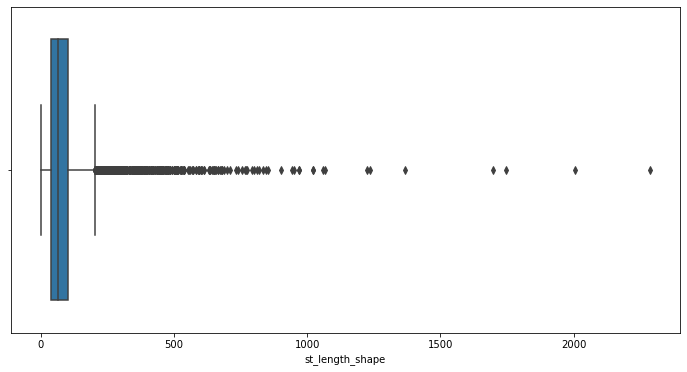

In [639]:
plt.figure(figsize=(12,6))
sns.boxplot(data=calles, x='st_length_shape');

It seems like the longer streets are big outliers. Let's explore them.

In [640]:
calles[calles.st_length_shape > 2000]

,Street ID,Street Type,Street Name,Max Speed,st_length_shape,geo_shape,geo_point_2d,Residential,Bikeway
4482,12094,Road,Riu,30,2286.498311,"{""coordinates"": [[-0.331488911512039, 39.38912...","39.39904513528616, -0.33313875526160186",0,0
11797,3028,Path,Palmar,30,2005.559318,"{""coordinates"": [[-0.31769316448711316, 39.313...","39.32243259574005, -0.31813198709208035",0,0


They are both long roads, so it makes sense.

In [641]:
calles[calles.st_length_shape < 1]

,Street ID,Street Type,Street Name,Max Speed,st_length_shape,geo_shape,geo_point_2d,Residential,Bikeway
4105,14584,Square,Actor Luis Ramirez,0,0.829788,"{""coordinates"": [[-0.3700045680555816, 39.4924...","39.492467893364534, -0.3700072502237082",0,0


While the smallest one is a small square. It all is coherent.

Since this field has high accuracy, it might seem unreasonable to have repeated values. Let us explore these cases.

#### Duplicate rows

In [642]:
calles[calles.duplicated('st_length_shape', keep=False)]

,Street ID,Street Type,Street Name,Max Speed,st_length_shape,geo_shape,geo_point_2d,Residential,Bikeway
165,8909,Street,Republica Argentina,30,43.878383,"{""coordinates"": [[-0.35136155204364045, 39.473...","39.47325732074454, -0.3512717160645635",0,0
313,9658,Street,Elias Borras,30,23.584953,"{""coordinates"": [[-0.3858055737053277, 39.4838...","39.48389881067885, -0.3858748010048828",0,0
330,9139,Street,Arquebisbe Company,30,37.640570,"{""coordinates"": [[-0.33018363744957063, 39.473...","39.47329231443511, -0.3301583100046893",0,0
380,13501,Street,Baix,20,58.060299,"{""coordinates"": [[-0.379153217809011, 39.47776...","39.47793838914813, -0.3789352009217926",1,0
472,9763,Avenue,Tarongers,50,160.520434,"{""coordinates"": [[-0.3355131816633122, 39.4768...","39.47662828692671, -0.3346378520029547",0,0
...,...,...,...,...,...,...,...,...,...
11863,3210,Street,Maximilia Thous,50,87.301643,"{""coordinates"": [[-0.37352578604676734, 39.487...","39.48748230431135, -0.37303310688484714",0,0
12162,6271,Street,Ruben Vela,30,30.205804,"{""coordinates"": [[-0.374201544376484, 39.45567...","39.45555791447653, -0.37411668319308244",0,0
12203,5966,Avenue,Regne De Valencia,30,30.205804,"{""coordinates"": [[-0.3649314918650971, 39.4629...","39.463112944064186, -0.36501634562568575",0,0
12522,4157,Square,Castell D Enguera,30,31.504960,"{""coordinates"": [[-0.3930585822732193, 39.4363...","39.43634582682891, -0.39287787728277723",0,0


In [643]:
calles[calles.duplicated(['Street Name', 'st_length_shape'], keep=False)].sort_values('st_length_shape')

,Street ID,Street Type,Street Name,Max Speed,st_length_shape,geo_shape,geo_point_2d,Residential,Bikeway
6113,2611,Avenue,Constitucio,30,4.998030,"{""coordinates"": [[-0.3736453178821706, 39.4925...","39.49256069304165, -0.3736347904619859",0,0
5969,1948,Avenue,Constitucio,50,4.998030,"{""coordinates"": [[-0.3735782119165115, 39.4925...","39.49255324843273, -0.373567684477725",0,0
1568,6235,Avenue,Port,50,16.931851,"{""coordinates"": [[-0.3387439272840729, 39.4617...","39.461752020882614, -0.33865128164982994",0,0
2960,10477,Avenue,Port,50,16.931851,"{""coordinates"": [[-0.3387439272840729, 39.4617...","39.461752020882614, -0.33865128164982994",0,0
9026,5802,Avenue,Regne De Valencia,30,21.616328,"{""coordinates"": [[-0.3672155441428819, 39.4634...","39.463580949105, -0.36718222379062293",0,0
...,...,...,...,...,...,...,...,...,...
4432,11544,Avenue,Constitucio,30,140.124329,"{""coordinates"": [[-0.3733054505870137, 39.4931...","39.49371856234321, -0.3729391638848583",0,0
7445,2970,Avenue,Germans Machado,30,152.086580,"{""coordinates"": [[-0.38925858676103936, 39.499...","39.500477462004625, -0.38980835975656336",0,0
5973,1959,Avenue,Germans Machado,50,152.086580,"{""coordinates"": [[-0.38879440707764895, 39.500...","39.50070520182148, -0.3893441780805131",0,0
9470,5496,Avenue,Tarongers,50,160.520434,"{""coordinates"": [[-0.3355131816633122, 39.4768...","39.47662828692671, -0.3346378520029547",0,0


We observe that when looking at duplicates for both street length and stree name, we see some pairs that are different in speed and coordinates (might be due to multiple lanes or different trecks of the same street), while some contain the same value.

In [644]:
calles[calles.duplicated(['Street Name', 'st_length_shape', 'Max Speed', 'geo_point_2d'], keep=False)].sort_values('st_length_shape')

,Street ID,Street Type,Street Name,Max Speed,st_length_shape,geo_shape,geo_point_2d,Residential,Bikeway
1568,6235,Avenue,Port,50,16.931851,"{""coordinates"": [[-0.3387439272840729, 39.4617...","39.461752020882614, -0.33865128164982994",0,0
2960,10477,Avenue,Port,50,16.931851,"{""coordinates"": [[-0.3387439272840729, 39.4617...","39.461752020882614, -0.33865128164982994",0,0
7592,2288,Path,Perolo,30,33.989151,"{""coordinates"": [[-0.378535393338474, 39.49851...","39.498667452052054, -0.37856113828281046",0,0
2688,9481,Path,Perolo,30,33.989151,"{""coordinates"": [[-0.37858688322714695, 39.498...","39.498667452052054, -0.37856113828281046",0,0
6121,2476,Road,Malilla,30,38.519675,"{""coordinates"": [[-0.37829352533464816, 39.454...","39.4542819199998, -0.3782504621237044",0,0
5821,4844,Road,Malilla,30,38.519675,"{""coordinates"": [[-0.3782073989127607, 39.4544...","39.4542819199998, -0.3782504621237044",0,0
9882,7185,Street,Mare De Deu Del Sufragi,30,47.753671,"{""coordinates"": [[-0.3264825873539213, 39.4668...","39.46676933597981, -0.32620810926939736",0,0
10768,9681,Street,Mare De Deu Del Sufragi,30,47.753671,"{""coordinates"": [[-0.3264825873539213, 39.4668...","39.46676933597981, -0.32620810926939736",0,0
2780,11230,Square,Nicolas Ferrer I Julve,0,48.157233,"{""coordinates"": [[-0.37799780904563285, 39.455...","39.45563535534208, -0.3777495203876747",0,0
3476,2920,Square,Nicolas Ferrer I Julve,0,48.157233,"{""coordinates"": [[-0.3775012317297165, 39.4557...","39.45563535534208, -0.3777495203876747",0,0


We will delete those duplicates and rename the feature.

In [645]:
calles.drop_duplicates(subset=['Street Name', 'st_length_shape', 'Max Speed', 'geo_point_2d'], inplace=True)

In [646]:
calles = calles.rename(columns={'st_length_shape': 'Street Length'})

### geo_shape

The "geo_shape" feature refers to a data type indicating the geographical location of the given street ([see elasticsearch description](https://www.elastic.co/guide/en/elasticsearch/reference/current/geo-shape.html)). For example, for the first row, we see the following shape:

In [647]:
pd.DataFrame(json.loads(calles.iloc[2]['geo_shape']))

,coordinates,type
0,"[-0.3335985925218705, 39.46398198202541]",LineString
1,"[-0.3335819058888548, 39.46398159916537]",LineString
2,"[-0.3329541939975122, 39.46390864730226]",LineString


We see a LineString geo_shape data, indicating a street represented by a line, where the two sets of coordinates (longitude, latitude) are the beginning and end of line.

We will expand this field as multiple features:

In [648]:
calles = pd.concat([calles.drop('geo_shape', axis=1), calles['geo_shape'].apply(json.loads).apply(pd.Series)], axis=1)

In [649]:
calles.head()

,Street ID,Street Type,Street Name,Max Speed,Street Length,geo_point_2d,Residential,Bikeway,coordinates,type
0,6543,Street,Borriana,30,110.438921,"39.46497917115678, -0.3670659296642545",0,0,"[[-0.3676281242168885, 39.464739661983614], [-...",LineString
1,6547,Street,Virginia Woolf,0,31.060677,"39.46552907325966, -0.39837878029210605",0,0,"[[-0.39833955231016577, 39.46566557981171], [-...",LineString
2,6549,Street,Maria Cuber,30,56.073901,"39.46394606678843, -0.33327634103883713",0,0,"[[-0.3335985925218705, 39.46398198202541], [-0...",LineString
3,6550,Street,Pelai,30,76.720942,"39.46527961635818, -0.3792601382226916",0,0,"[[-0.3791199815957301, 39.46560752488556], [-0...",LineString
4,6552,Street,Lo Rat Penat,30,181.701132,"39.465148658939995, -0.3543057149035328",0,0,"[[-0.3539200698497013, 39.465910241605584], [-...",LineString


In [650]:
calles['type'].value_counts()

LineString    12772
Name: type, dtype: int64

As there are only streets with LineString geo_shape, that means that all data on streets were recorded linearly. This is also consistent with the fact that street names are not unique, as parts of the same street might have been recorded separately.

In [651]:
calles = calles.drop('type', axis=1)

In [652]:
coordinates = pd.DataFrame(calles.coordinates.tolist())

Let us plot the number 

In [653]:
coordinate_lengths = []
for i in range(2, coordinates.shape[1]):
    length = coordinates[i].notnull().sum()
    coordinate_lengths.append(length)

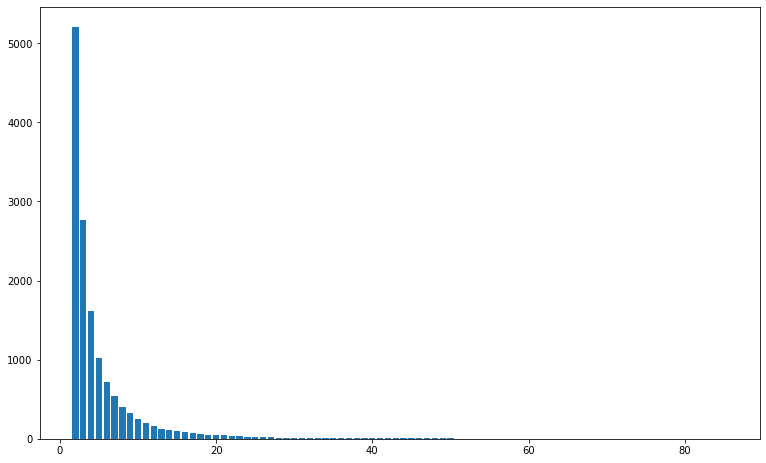

In [654]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0,0,1,1])
ax.bar(np.arange(2, 86), np.array(coordinate_lengths))
plt.show();

In [655]:
coordinates[coordinates[84].notnull()]

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
3496,"[-0.3983572526824076, 39.45799228377368]","[-0.39801468990301664, 39.45828388869783]","[-0.3976367888181001, 39.45802143230751]","[-0.397637674193372, 39.45801513693412]","[-0.39763846667455854, 39.45800883948068]","[-0.3976391665970758, 39.45800253094587]","[-0.39763977362554653, 39.457996220331054]","[-0.39764028776000504, 39.4579899076362]","[-0.3976407093358699, 39.45798358385998]","[-0.3976410496295084, 39.45797725826375]",...,"[-0.39746211682697086, 39.457587051546895]","[-0.3974567036869346, 39.45758230879554]","[-0.3974512304767877, 39.457577618751856]","[-0.3974456859202756, 39.457572972154495]","[-0.39744006968197143, 39.457568378004744]","[-0.39743439370898603, 39.45756382756129]","[-0.3974286460542129, 39.45755932956546]","[-0.397422838664762, 39.457554875275896]","[-0.39741697086976224, 39.45755048269528]","[-0.3975632711215774, 39.45743167990419]"


Many of these might be redundant, but we will not delete them due to loss of information.

In [656]:
calles = calles.rename(columns={'coordinates': 'Street Coordinates'})

### geo_point_2d

This feature is a reference point for each street in the data set. We can also check that it is actually the arithmetic mean of all coordinates from the original geo_shape feature.

In [657]:
np.mean(np.array(calles.iloc[0]['Street Coordinates']), axis=0)

array([-0.36706593, 39.46497917])

In [658]:
calles.iloc[0]['geo_point_2d']

'39.46497917115678, -0.3670659296642545'

However, its coordinates are given as (latitude, longitude) as opposed to the reversed order given by GIS geo_shape. For ease in applications, we will expand this field into two new columns.

In [659]:
calles[['Latitude', 'Longitude']] = calles.geo_point_2d.str.split(', ', expand=True)

In [660]:
calles = calles.drop('geo_point_2d', axis=1)

Finally, the analysis didn't provide new information about Street ID, so let's drop that feature altogether.

In [661]:
calles = calles.drop('Street ID', axis=1)

## 4. Final Result

In [663]:
calles = calles[['Street Name', 'Street Type', 'Residential', 'Bikeway', 'Street Length', 'Latitude', 'Longitude', 'Street Coordinates']]

In [664]:
calles.head()

,Street Name,Street Type,Residential,Bikeway,Street Length,Latitude,Longitude,Street Coordinates
0,Borriana,Street,0,0,110.438921,39.46497917115678,-0.3670659296642545,"[[-0.3676281242168885, 39.464739661983614], [-..."
1,Virginia Woolf,Street,0,0,31.060677,39.46552907325966,-0.39837878029210605,"[[-0.39833955231016577, 39.46566557981171], [-..."
2,Maria Cuber,Street,0,0,56.073901,39.46394606678843,-0.33327634103883713,"[[-0.3335985925218705, 39.46398198202541], [-0..."
3,Pelai,Street,0,0,76.720942,39.46527961635818,-0.3792601382226916,"[[-0.3791199815957301, 39.46560752488556], [-0..."
4,Lo Rat Penat,Street,0,0,181.701132,39.465148658939995,-0.3543057149035328,"[[-0.3539200698497013, 39.465910241605584], [-..."


In [666]:
calles.to_csv('valencian_streets.csv', index=False)